In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import sklearn
import seaborn as sns
import datetime

In [4]:
#Reading in the datasets
play = pd.read_csv('fifa_cleaned.csv')
play.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [5]:
#Describing the dataset
play.describe()

,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,215411.087780,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,...,48.357302,58.680183,47.162861,47.733040,45.705915,16.784449,16.556199,16.388660,16.541049,16.874067
std,29758.387106,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,...,15.810844,11.625541,20.037346,21.674973,21.285812,17.893895,17.108234,16.701447,17.231495,18.182943
min,16.000000,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,...,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201117.250000,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,222919.000000,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.500000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,237613.500000,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,247607.000000,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,90.000000,94.000000


In [6]:
#group by nationality
grouped_players = play.groupby(['nationality'])
print(grouped_players)

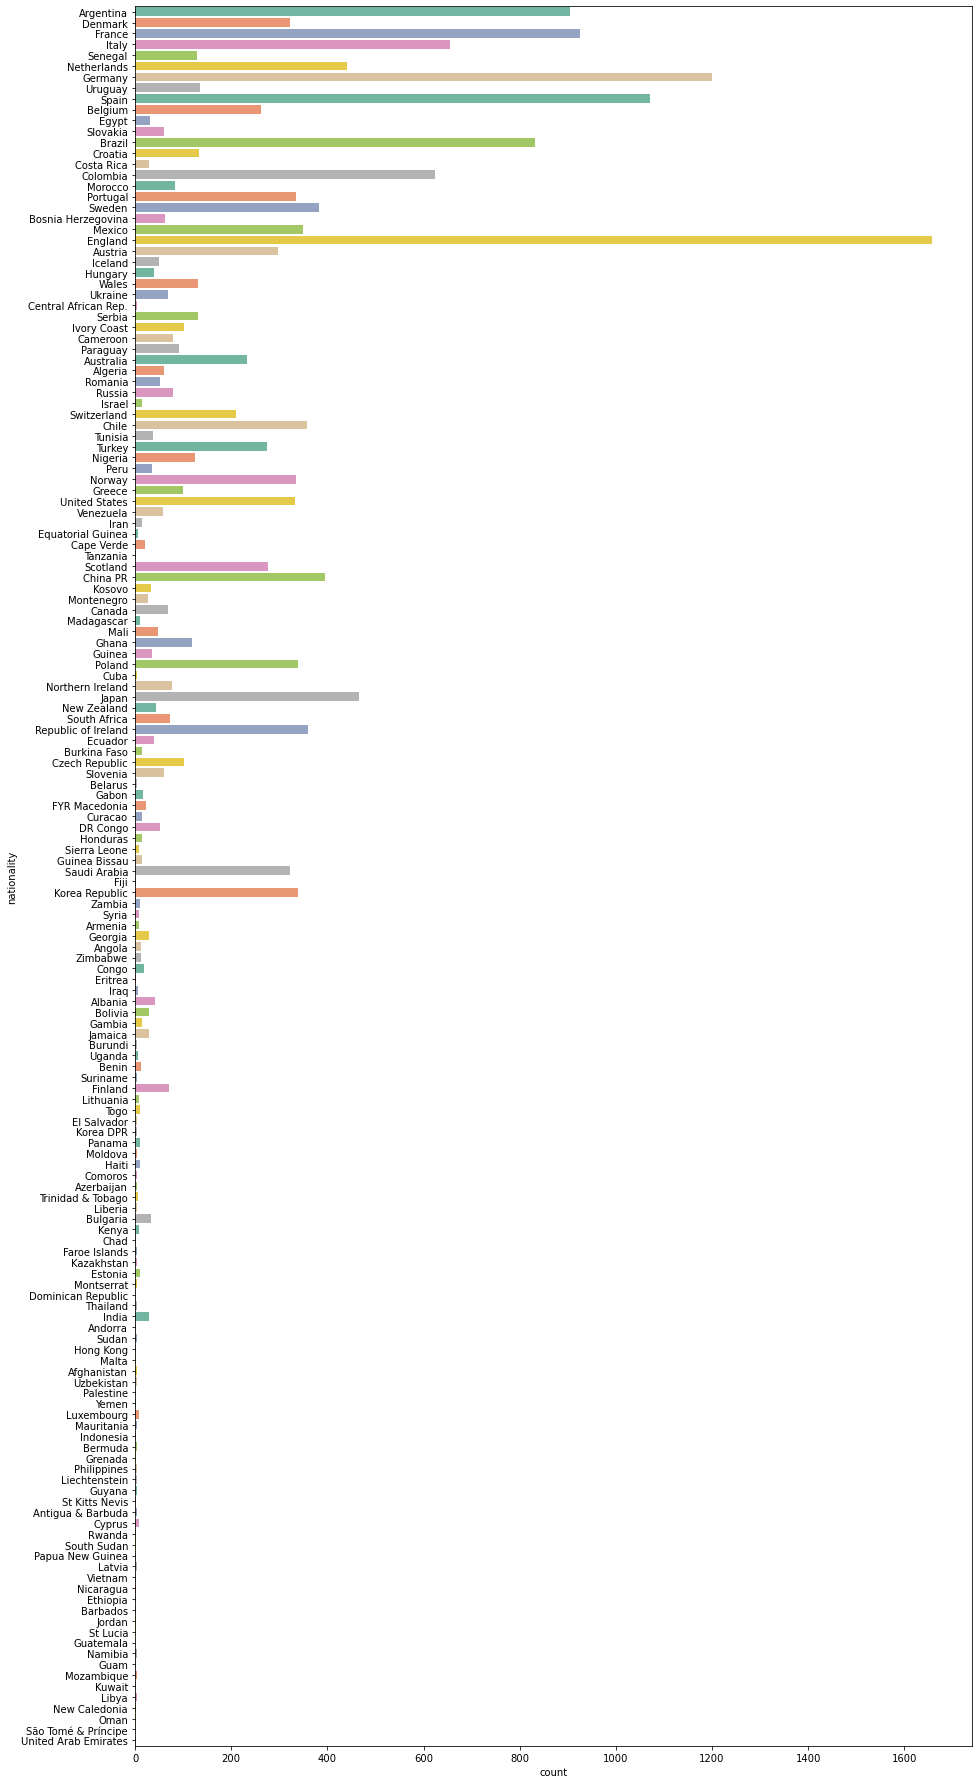

In [7]:
 #Plot all the nations on Y Axis; Graph of number of players as per their nationality
plt.figure(figsize=(15,32))
 
sns.countplot(y = play.nationality,palette="Set2")
#Top 5 countries with maximum players- England, Germany, Spain, France and Argentina

In [8]:
#Eliminating all the null values in the dataset
play = play.fillna(0)
play

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,204322,R. McKenzie,Rory McKenzie,1993-10-07,25,175.26,74.8,"RM,CAM,CM",Scotland,67,...,53+2,52+2,52+2,52+2,53+2,50+2,46+2,46+2,46+2,50+2
17950,239762,M. Sipľak,Michal Sipľak,1996-02-02,23,182.88,79.8,LB,Slovakia,59,...,57+2,55+2,55+2,55+2,57+2,57+2,58+2,58+2,58+2,57+2
17951,235155,J. Bekkema,Jan Bekkema,1996-04-09,22,185.42,89.8,GK,Netherlands,59,...,0,0,0,0,0,0,0,0,0,0
17952,244883,A. Al Yami,Abdulrahman Al Yami,1997-06-19,21,175.26,64.9,"ST,LM",Saudi Arabia,59,...,41+2,35+2,35+2,35+2,41+2,39+2,32+2,32+2,32+2,39+2


In [9]:
play.describe()

,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.795400e+04,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,215411.087780,25.565445,174.946921,75.301047,66.240169,71.430935,2.444067e+06,9766.458728,1.111674,2.945695,...,48.357302,58.680183,47.162861,47.733040,45.705915,16.784449,16.556199,16.388660,16.541049,16.874067
std,29758.387106,4.705708,14.029449,7.083684,6.963730,6.131339,5.654097e+06,21874.687749,0.392168,0.663691,...,15.810844,11.625541,20.037346,21.674973,21.285812,17.893895,17.108234,16.701447,17.231495,18.182943
min,16.000000,17.000000,152.400000,49.900000,47.000000,48.000000,0.000000e+00,0.000000,1.000000,1.000000,...,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201117.250000,22.000000,154.940000,69.900000,62.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,...,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,222919.000000,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.500000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,237613.500000,29.000000,185.420000,79.800000,71.000000,75.000000,2.000000e+06,9000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,247607.000000,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,90.000000,94.000000


In [10]:
#Converting all numeric values to int from type string
fix_cols = ['acceleration','aggression', 'agility', 'balance', 'ball_control', 'composure',
    'crossing', 'curve', 'dribbling', 'finishing', 'freekick_accuracy',
    'GK_diving', 'GK_handling', 'GK_kicking', 'GK_positioning',
    'GK_reflexes', 'heading_accuracy', 'interceptions', 'jumping',
    'long_passing', 'long_shots', 'marking', 'penalties', 'positioning',
    'reactions', 'short_passing', 'shot_power', 'sliding_tackle',
    'sprint_speed', 'stamina', 'standing_tackle', 'strength', 'vision',
    'volleys']

In [12]:
for col in fix_cols:
    
    play[col] = play[col].apply(lambda x : eval(str(x)))
    
play

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,204322,R. McKenzie,Rory McKenzie,1993-10-07,25,175.26,74.8,"RM,CAM,CM",Scotland,67,...,53+2,52+2,52+2,52+2,53+2,50+2,46+2,46+2,46+2,50+2
17950,239762,M. Sipľak,Michal Sipľak,1996-02-02,23,182.88,79.8,LB,Slovakia,59,...,57+2,55+2,55+2,55+2,57+2,57+2,58+2,58+2,58+2,57+2
17951,235155,J. Bekkema,Jan Bekkema,1996-04-09,22,185.42,89.8,GK,Netherlands,59,...,0,0,0,0,0,0,0,0,0,0
17952,244883,A. Al Yami,Abdulrahman Al Yami,1997-06-19,21,175.26,64.9,"ST,LM",Saudi Arabia,59,...,41+2,35+2,35+2,35+2,41+2,39+2,32+2,32+2,32+2,39+2


In [13]:
#Extracting numeric columns from the dataset
play.describe().columns

Index(['id', 'age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'release_clause_euro',
       'club_rating', 'club_jersey_number', 'national_rating',
       'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes'],
      dtype='object')

In [14]:
play = play[['name','id', 'age', 'height_cm', 'weight_kgs', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'release_clause_euro',
       'club_rating', 'club_jersey_number', 'national_rating',
       'national_jersey_number', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'GK_diving', 'GK_handling', 'GK_kicking',
       'GK_positioning', 'GK_reflexes']]

In [15]:
play.head()

,name,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
0,L. Messi,158023,31,170.18,72.1,94,94,110500000.0,565000.0,5,...,75,96,33,28,26,6,11,15,14,8
1,C. Eriksen,190460,27,154.94,76.2,88,89,69500000.0,205000.0,3,...,67,88,59,57,22,9,14,7,7,6
2,P. Pogba,195864,25,190.50,83.9,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,5,6,2,4,3
3,L. Insigne,198219,27,162.56,59.0,88,88,62000000.0,165000.0,3,...,61,83,51,24,22,8,4,14,9,10
4,K. Koulibaly,201024,27,187.96,88.9,88,91,60000000.0,135000.0,3,...,33,80,91,88,87,7,11,7,13,5


In [16]:
#Selecting players with an overall score above 85
play = play[play.overall_rating > 85] 

In [17]:
#Create a separate column for names
player_names= names = play.name.tolist() # saving names for later

play = play.drop(['name'], axis = 1) # drop the name column so that the dataframe consists of only numeric values
play.head()

,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
0,158023,31,170.18,72.1,94,94,110500000.0,565000.0,5,4,...,75,96,33,28,26,6,11,15,14,8
1,190460,27,154.94,76.2,88,89,69500000.0,205000.0,3,5,...,67,88,59,57,22,9,14,7,7,6
2,195864,25,190.50,83.9,88,91,73000000.0,255000.0,4,4,...,82,87,63,67,67,5,6,2,4,3
3,198219,27,162.56,59.0,88,88,62000000.0,165000.0,3,4,...,61,83,51,24,22,8,4,14,9,10
4,201024,27,187.96,88.9,88,91,60000000.0,135000.0,3,3,...,33,80,91,88,87,7,11,7,13,5


In [20]:
#Normalizing the dataset

from sklearn import preprocessing

x = play.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [21]:
#Combined the many columns existing into 2 columns for comparing


from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [22]:
# Created 10 clusters for analysis
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [23]:
reduced['cluster'] = clusters
reduced['name'] = player_names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.215896,-1.370897,4,L. Messi
1,-0.960187,-0.579216,0,C. Eriksen
2,-0.994312,0.126110,0,P. Pogba
3,-0.783180,-1.041438,4,L. Insigne
4,0.859726,1.645245,3,K. Koulibaly


C:\Users\shrik\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


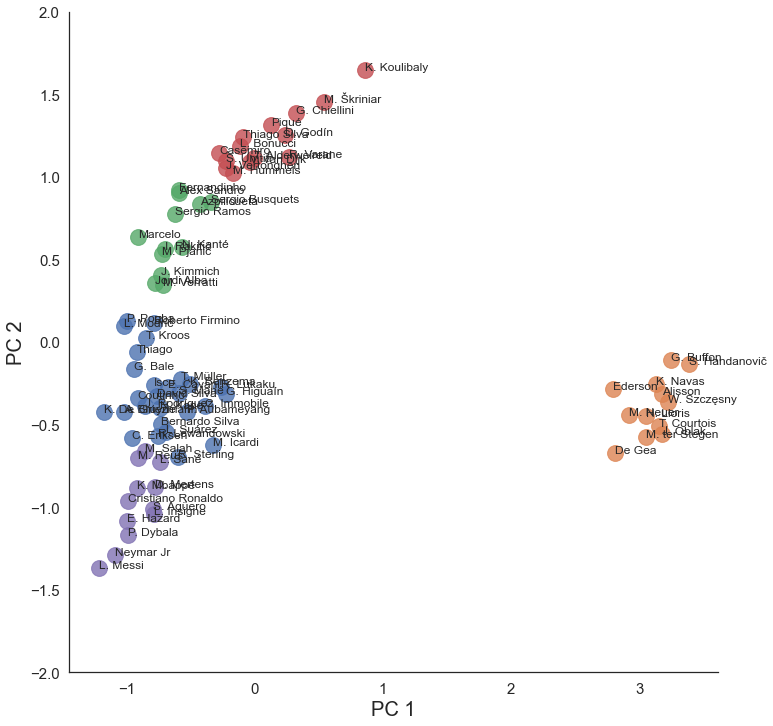

In [24]:
#Plotting

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

In [47]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
#from scipy.cluster.hierarchy import fcluster
#from scipy.cluster.hierarchy import cophenet
#from scipy.spatial.distance import pdist

#from pylab import rcParams

#from sklearn.cluster import AgglomerativeClustering
#import sklearn.metrics as sm


In [48]:
np.set_printoptions (precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
#plt.style.use('seaborn-whitegrid')

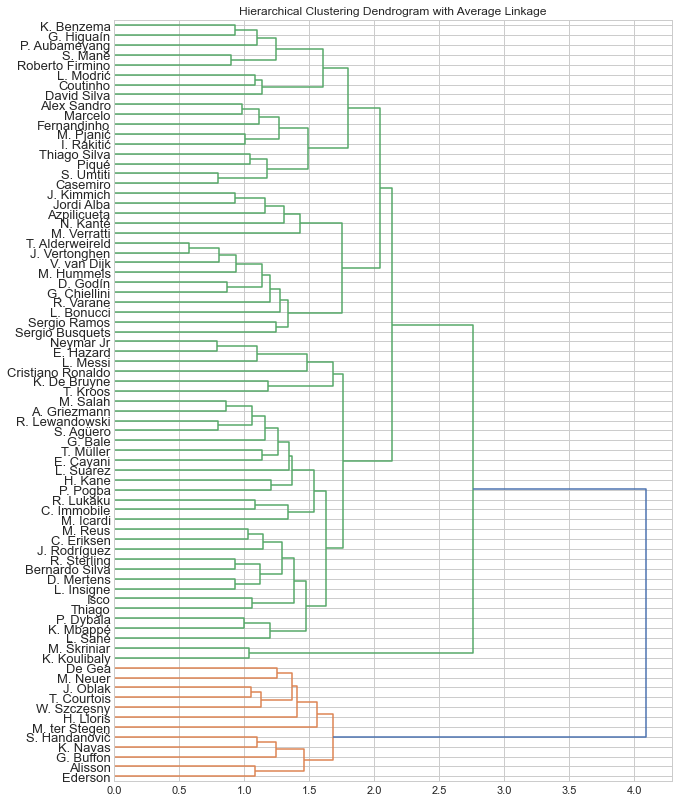

In [49]:
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram = dendrogram(linkage(X_norm, method="average"), labels= names, leaf_font_size = 13, orientation='right')

In [54]:
#plt.figure(figsize=(10,14))
#plt.title('Hierarchical Clustering Dendrogram with complete Linkage')

#dendrogram = dendrogram(linkage(X_norm, method='complete'), labels= names, leaf_font_size = 13, orientation='right')